<a href="https://colab.research.google.com/github/GalalMohammed/SHAI_Training_2022-b_Tasks/blob/main/Task_9_exercises_answered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [ ]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')
x, y = mnist["data"], mnist["target"]

#### peek at one digit

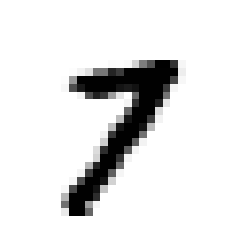

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x.iloc[40000]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
import numpy as np 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [ ]:
# CODE HERE
sgd_clf.fit(x_train.values,y_train)
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance 

In [ ]:
# CODE HERE
sgd_clf.decision_function([some_digit])

array([[-32945.26281916, -13539.2227941 , -12170.63618613,
        -13821.49680249, -21311.11522264, -11652.85249699,
        -45691.39531197,   8801.91781703,  -9336.77566059,
         -5139.07244418]])

#### find highest score 

In [ ]:
# CODE HERE
sgd_clf.decision_function([some_digit]).argmax()

7

#### list the target classes

In [ ]:
# CODE HERE
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

#### Find the the target class for 7

In [ ]:
# CODE HERE
# if you got stuck use GOOGLE
sgd_clf.classes_[7]

'7'

#### Force ScikitLearn to use one-versus-one

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# CODE HERE
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(x_train.values,y_train)
ovo_clf.predict([some_digit])

array(['7'], dtype=object)

#### find how many classifier OvO used

In [ ]:
# CODE HERE
len(ovo_clf.estimators_)

45

#### Train  RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
# CODE HERE
forest_clf.fit(x_train.values,y_train)
forest_clf.predict([some_digit])

array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

#### Find accurcy using cross validation score ()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# CODE HERE
cross_val_score(sgd_clf, x_train,y_train,scoring="accuracy")

array([0.85508333, 0.8865    , 0.84441667, 0.85825   , 0.87291667])

In [ ]:
cross_val_score(ovo_clf, x_train,y_train,scoring="accuracy")

array([0.91116667, 0.90933333, 0.90683333, 0.90916667, 0.90658333])

In [ ]:
cross_val_score(forest_clf, x_train,y_train,scoring="accuracy")

array([0.96616667, 0.9675    , 0.96758333, 0.96908333, 0.96625   ])

#### to get better accurcy try scaling input

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# CODE HERE
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled , y_train, scoring = "accuracy")

array([0.8925    , 0.89333333, 0.90658333, 0.89791667, 0.9015    ])

In [ ]:
cross_val_score(ovo_clf,x_train_scaled , y_train, scoring = "accuracy")

array([0.91916667, 0.921     , 0.91766667, 0.91841667, 0.91941667])

In [ ]:
cross_val_score(forest_clf,x_train_scaled , y_train, scoring = "accuracy")

array([0.96625   , 0.96741667, 0.9675    , 0.96908333, 0.96616667])

## Error Analysis

#### Take a look at the confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
# CODE HERE
conf_mx = confusion_matrix(y_train, cross_val_predict(sgd_clf, x_train_scaled, y_train) )
conf_mx

array([[5572,    0,   14,    5,    8,   40,   31,    6,  246,    1],
       [   0, 6411,   42,   22,    3,   42,    4,    7,  201,   10],
       [  24,   25, 5230,   88,   69,   21,   67,   38,  389,    7],
       [  27,   20,  100, 5214,    0,  198,   25,   40,  445,   62],
       [  11,   12,   40,   11, 5206,    9,   35,   21,  357,  140],
       [  24,   15,   23,  141,   48, 4478,   77,   13,  543,   59],
       [  26,   17,   44,    1,   40,   82, 5557,    6,  145,    0],
       [  20,   14,   51,   19,   46,   14,    4, 5695,  209,  193],
       [  15,   60,   34,   93,    2,  119,   29,    7, 5453,   39],
       [  23,   23,   28,   57,  117,   36,    1,  173,  405, 5086]])

In [ ]:
conf_mx = confusion_matrix(y_train, cross_val_predict(ovo_clf, x_train_scaled, y_train) )
conf_mx

array([[5650,    1,   32,   12,    8,   96,   59,   10,   45,   10],
       [   1, 6532,   47,   25,    8,   21,    2,   15,   80,   11],
       [  23,   43, 5363,  147,   67,   48,   46,   64,  144,   13],
       [  19,   18,  109, 5457,    5,  218,    4,   37,  224,   40],
       [   6,   21,   87,   10, 5362,   30,   29,   31,   47,  219],
       [  32,   12,   40,  195,   28, 4812,   70,   10,  179,   43],
       [  35,   11,   91,    8,   37,   93, 5577,    1,   64,    1],
       [   7,   15,   86,   58,   46,   24,    3, 5773,   42,  211],
       [  27,   61,   89,  168,   11,  172,   35,   18, 5201,   69],
       [  13,   32,   32,   67,  177,   50,    1,  185,   87, 5305]])

In [ ]:
conf_mx = confusion_matrix(y_train, cross_val_predict(forest_clf, x_train_scaled, y_train) )
conf_mx

array([[5850,    1,    7,    0,    5,    6,   16,    1,   34,    3],
       [   1, 6643,   35,   13,   12,    5,    6,   11,   10,    6],
       [  22,   11, 5768,   28,   27,    0,   21,   38,   37,    6],
       [   6,    8,   82, 5815,    3,   70,    6,   54,   57,   30],
       [  10,    8,    8,    1, 5664,    1,   27,   11,   15,   97],
       [  20,    6,   11,   67,   11, 5203,   41,    5,   37,   20],
       [  25,   11,    4,    0,    9,   35, 5816,    0,   18,    0],
       [   3,   20,   54,    6,   41,    1,    0, 6051,   13,   76],
       [  11,   32,   30,   53,   22,   41,   25,    7, 5574,   56],
       [  22,   11,   12,   82,   61,   20,    5,   48,   35, 5653]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

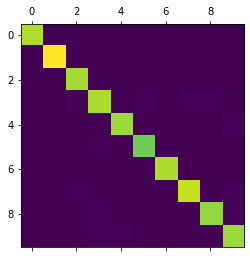

In [ ]:
# CODE HERE
plt.matshow(conf_mx)

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

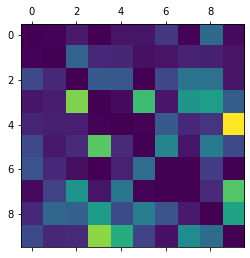

In [ ]:
# CODE HERE
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx)

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
sgd_y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train)
ovo_y_train_pred = cross_val_predict(ovo_clf, x_train_scaled, y_train)
forest_y_train_pred = cross_val_predict(forest_clf, x_train_scaled, y_train)

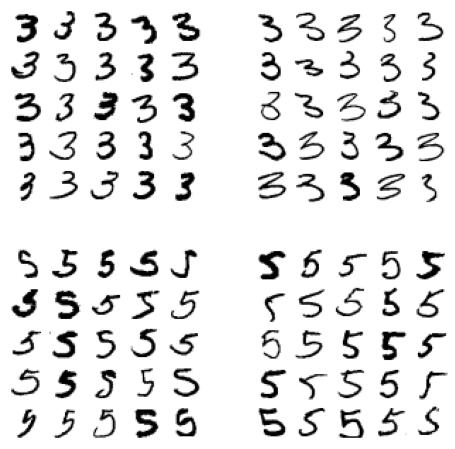

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (sgd_y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (sgd_y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (sgd_y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (sgd_y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].values, images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].values, images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].values, images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].values, images_per_row=5)
plt.show()

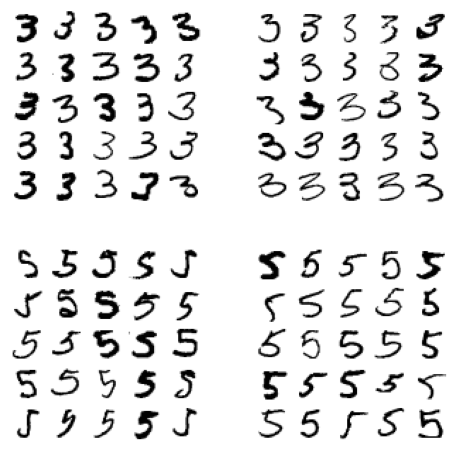

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (ovo_y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (ovo_y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (ovo_y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (ovo_y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].values, images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].values, images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].values, images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].values, images_per_row=5)
plt.show()

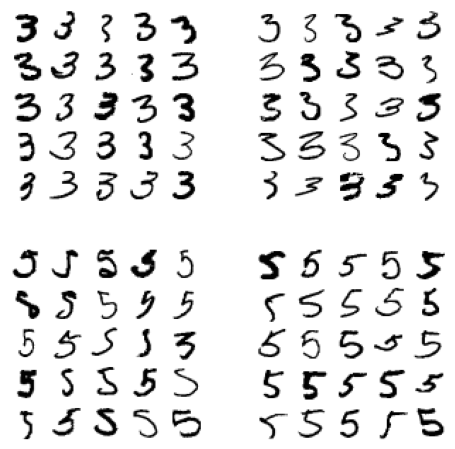

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (forest_y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (forest_y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (forest_y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (forest_y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].values, images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].values, images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].values, images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].values, images_per_row=5)
plt.show()

## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [ ]:
import pandas as pd
y_train = pd.Categorical(y_train, categories=["0","1","2","3",'4','5','6','7','8','9'], ordered=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_7 = (y_train >= '7')
y_train_1 = (y_train == '1')
y_multilabel = np.c_[y_train_7, y_train_1]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train.values, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [ ]:
# CODE HERE
knn_clf.predict([some_digit])

array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [ ]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


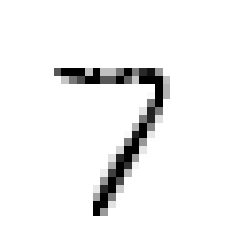

In [ ]:
# CODE HERE
knn_clf.fit(X_train_mod.values, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[0]])
plot_digits(clean_digit)

# Congrats you've finished your first classification Project🥳 !
# #shAI_Club